In [ ]:
#[PCA] 使用 'USArrests' 數據：問題解答與中英文解釋
#(a) 使用 PCA() 函數找出前四個主成分負荷向量 (Show the first to fourth principal component loadings vectors using PCA() function)

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# 從 statsmodels 中獲取 USArrests 數據
# Load the 'USArrests' dataset
df = sm.datasets.get_rdataset('USArrests', 'datasets').data

# 標準化數據
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 進行 PCA 分析，取前四個主成分
# Perform PCA with the first four principal components
pca = PCA(n_components=4)
pca.fit(df_scaled)

# 顯示前四個主成分的負荷向量
# Display the first four principal component loadings
loadings = pca.components_
print(loadings)


#使用 PCA() 函數來提取前四個主成分負荷向量，這些向量代表了數據集中每個變量對主成分的貢獻。
#used the PCA() function to extract the first four principal component loadings,
#which represent the contribution of each variable to the principal components.

#(b) 使用 np.linalg.eig() 計算前四個主成分負荷向量 (Use np.linalg.eig() to find the first to #fourth principal component loadings vectors)

import numpy as np

# 計算協方差矩陣
# Compute the covariance matrix
cov_matrix = np.cov(df_scaled.T)

# 使用 eig() 函數計算特徵值和特徵向量
# Use eig() function to compute eigenvalues and eigenvectors
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

# 顯示特徵向量（主成分負荷向量）
# Display the eigenvectors (principal component loadings)
print(eig_vectors[:,:])

#使用 np.linalg.eig() 函數從協方差矩陣中提取特徵值和特徵向量，這些特徵向量也就是主成分負荷向量。
#used the np.linalg.eig() function to extract the eigenvalues and eigenvectors from the covariance matrix.
#The eigenvectors are the principal component loadings.

#(c) 使用 np.linalg.svd() 計算前四個主成分負荷向量
#(Use np.linalg.svd() to find the first to fourth principal component loadings vectors)
# 使用 SVD 分解數據矩陣
# Perform Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(df_scaled)

# 顯示 V 的轉置（即主成分負荷向量）
# Display V transpose (principal component loadings)
print(Vt[:])

#使用 SVD 方法分解標準化後的數據矩陣，我們可以從 V 的轉置中獲得主成分負荷向量。

#使用 SVD 方法分解標準化後的數據矩陣，我們可以從 V 的轉置中獲得主成分負荷向量。
#Using Singular Value Decomposition (SVD),
#we decompose the standardized data matrix and extract the principal component loadings from the transpose of 𝑉.

#(d) 結果分析 (Analysis of Results)
#問題：這些結果 (a), (b), 和 (c) 是否完全相同？為什麼？
#(Are the results from (a), (b), and (c) exactly the same? Why or why not?)

#是的，儘管負荷向量的符號和排列可能不同，但它們在數學上是等價的。這是因為 PCA 中的主成分負荷向量可以翻轉其符號，這不會改變其解釋。
#Yes, although the signs and arrangement of the loadings might differ, they are mathematically equivalent.
#This is because in PCA, principal component loadings can have their signs flipped without affecting the interpretation.

[[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [-0.41818087 -0.1879856   0.87280619  0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [-0.6492278   0.74340748 -0.13387773 -0.08902432]]
[[ 0.53589947  0.41818087  0.6492278  -0.34123273]
 [ 0.58318363  0.1879856  -0.74340748 -0.26814843]
 [ 0.27819087 -0.87280619  0.13387773 -0.37801579]
 [ 0.54343209 -0.16731864  0.08902432  0.81777791]]
[[-0.53589947 -0.58318363 -0.27819087 -0.54343209]
 [-0.41818087 -0.1879856   0.87280619  0.16731864]
 [ 0.34123273  0.26814843  0.37801579 -0.81777791]
 [ 0.6492278  -0.74340748  0.13387773  0.08902432]]


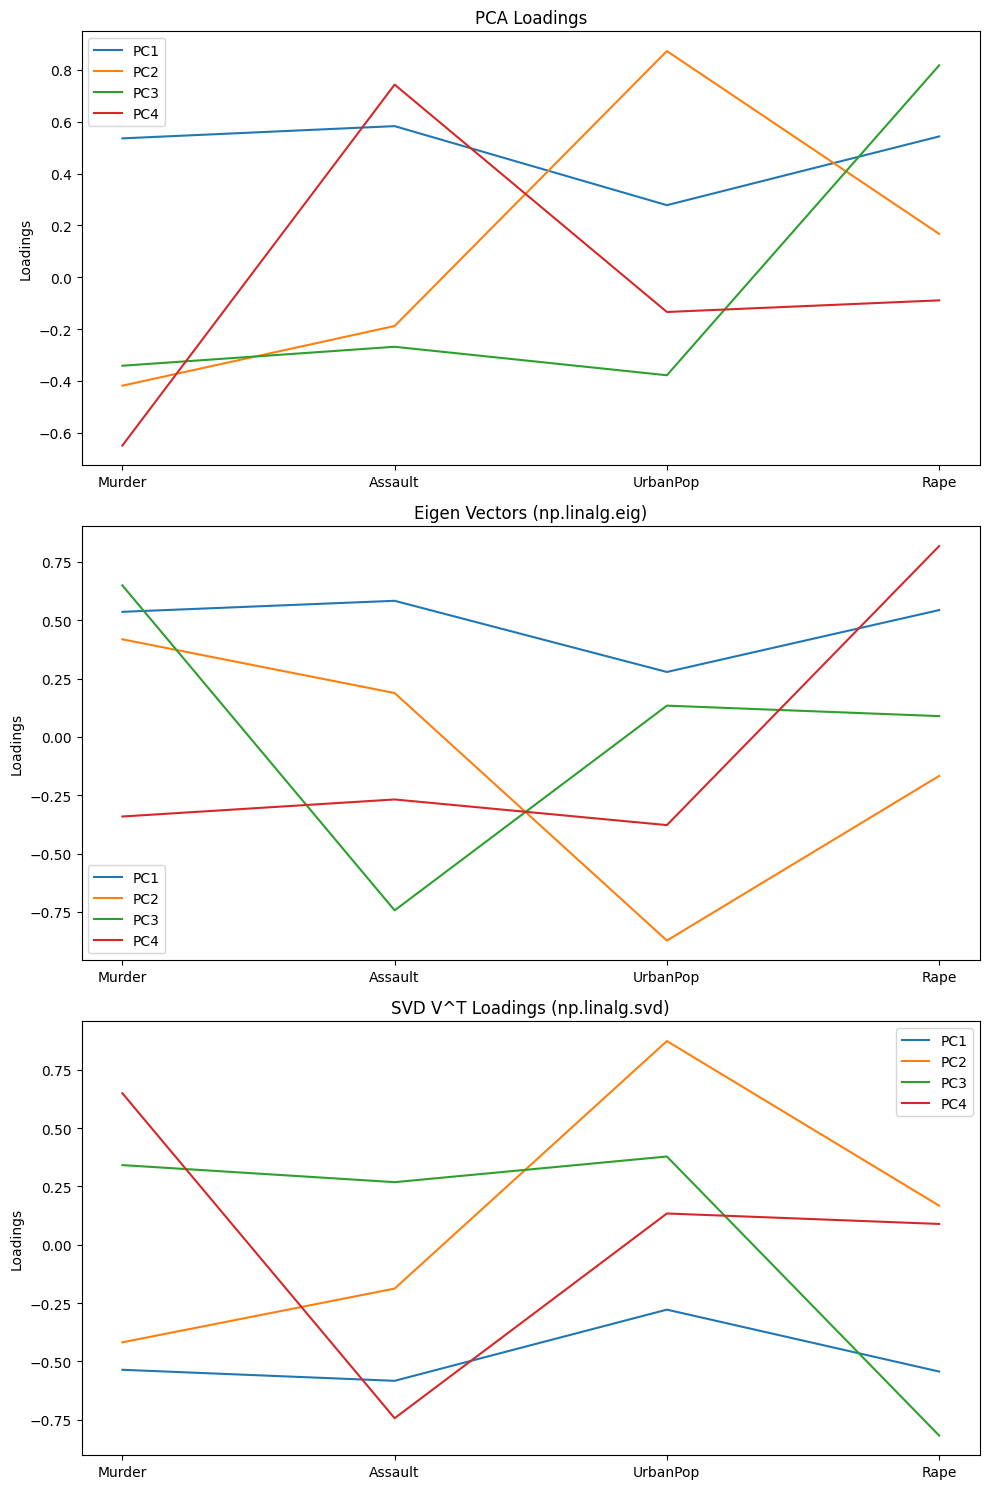

In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 從 statsmodels 中獲取 USArrests 數據
# Load the 'USArrests' dataset
df = sm.datasets.get_rdataset('USArrests', 'datasets').data

# 標準化數據
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# (a) 使用 PCA 函數
pca = PCA(n_components=4)
pca.fit(df_scaled)
loadings_pca = pca.components_

# (b) 使用 np.linalg.eig() 函數
cov_matrix = np.cov(df_scaled.T)
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

# (c) 使用 np.linalg.svd() 函數
U, S, Vt = np.linalg.svd(df_scaled)

# 繪製曲線圖來比較每個方法的前四個主成分負荷向量
x_labels = df.columns
x = np.arange(len(x_labels))

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# (a) PCA 結果曲線
for i in range(4):
    axs[0].plot(x, loadings_pca[i], label=f'PC{i+1}')
axs[0].set_title('PCA Loadings')
axs[0].set_xticks(x)
axs[0].set_xticklabels(x_labels)
axs[0].set_ylabel('Loadings')
axs[0].legend()

# (b) np.linalg.eig() 結果曲線
for i in range(4):
    axs[1].plot(x, eig_vectors[:, i], label=f'PC{i+1}')
axs[1].set_title('Eigen Vectors (np.linalg.eig)')
axs[1].set_xticks(x)
axs[1].set_xticklabels(x_labels)
axs[1].set_ylabel('Loadings')
axs[1].legend()

# (c) np.linalg.svd() 結果曲線
for i in range(4):
    axs[2].plot(x, Vt[i], label=f'PC{i+1}')
axs[2].set_title('SVD V^T Loadings (np.linalg.svd)')
axs[2].set_xticks(x)
axs[2].set_xticklabels(x_labels)
axs[2].set_ylabel('Loadings')
axs[2].legend()

plt.tight_layout()
plt.show()
